<a href="https://colab.research.google.com/github/nsubbaian/BayesianML/blob/master/Project6/BayesMLProject6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part One

First part of the sampling methods project is to perform rejection sampling to draw samples from a Gaussian mixture model.

Use the same mixture model from the EM project, and I suggest using regular normal RV for the proposal distribution. Draw samples using this method and plot a histogram of the generated samples against your GMM.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 

# Helpful Resources:
# https://www.youtube.com/watch?v=kYWHfgkRc9s

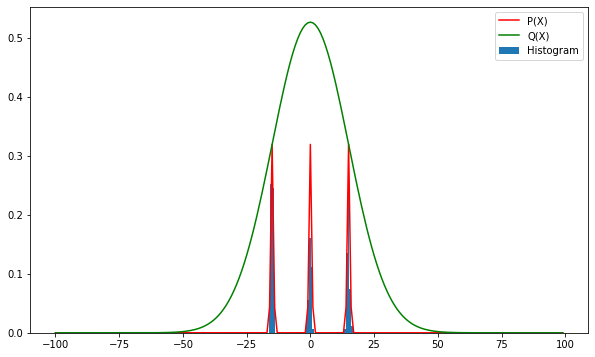

In [2]:
def p(x):
  mu = [-15, 0, 15]
  sigma = [.5, .5, .5]
  return norm.pdf(x,mu[0],sigma[0]) + norm.pdf(x,mu[1],sigma[1]) + norm.pdf(x,mu[2],sigma[2])

def q(x):
  return norm.pdf(x, 0, 15)

fig = plt.figure(figsize=[10,6])
x = np.arange(-100, 100)
k = max(p(x)/ q(x))
s = 2.5
plt.plot(x, p(x)/s, color='r', label='P(X)')
plt.plot(x, k*q(x)/s, color='g', label='Q(X)')

samples = []
for i in range(10000):
    z = np.random.normal(0, 50)
    u = np.random.uniform(0, q(z))

    # EQ 11.14
    if u <= p(z)/k:
      samples.append(z)

_ = plt.hist(samples, bins=50, density=True, label='Histogram')
plt.legend()

# Part Two

Part two of the sampling methods mini-project is to re-do the first part of your linear regression project using MCMC to find an estimate for the weights.

Reuse your project 2 to generate the same training data. Just do this for 25 training samples

Use Equation 3.10 as the likelihood function, to be used with the training samples you generated. You may select any distribution you want for the prior on the weights, and recall that the posterior density on the weights w is proportional to the likelihood x prior

Use the Metropolis algorithm as defined in equation 11.33 to compute an estimate of the weights.

A few practical tips - you'll need to use the log of the posterior, i.e. log (likelihood x prior) instead of the actual probabilities, due to numerical precision problems that will crop up with 25 training observations.

Remember to give the Markov chain a chance to 'burn in' and let it run for a few hundred samples or so before you start using those samples to compute an average on the weights.

The actual 'burn in' time is dependent on the proposal distribution you choose.

The proposal distribution you use can be different for each step of the algorithm - note this is different than in rejection sampling. A common choice is to recenter the proposal distribution on the previous stored sample. See the bottom of page 541- top of 542 for a more detailed explanation of this.

In [3]:
from scipy.stats import multivariate_normal, gaussian_kde
import warnings
warnings.filterwarnings('ignore')

# Helpful Resources:
# https://www.youtube.com/watch?v=OTO1DygELpY
# https://www.youtube.com/watch?v=VGRVRjr0vyw
# https://wiseodd.github.io/techblog/2015/10/17/metropolis-hastings/

entered
entered
entered
entered


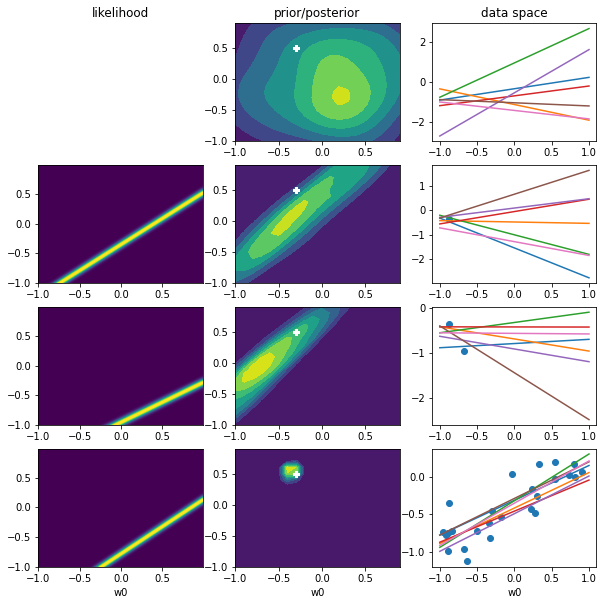

In [4]:
def Metropolis(burned, ind):
  print("entered")
  pw = [0,0]
  burn = 0
  weights = []

  while (burn < 1000):
      prob = 0
      cw = np.random.multivariate_normal(mean = [0,0], cov = np.eye(2))

      if ind:
        t = tn[0:ind]
        p = np.column_stack((np.ones(x[0:ind].shape[0]), x[0:ind]))
        precision = np.sqrt(1/beta)
        prob = np.sum(np.log(norm.pdf(t,(np.matmul(cw,p.T)).T,precision)))-\
         np.sum(np.log(norm.pdf(t,(np.matmul(pw, p.T)).T,precision)))

      if (prob) > np.log(np.random.rand(1)):
        pw = cw  
        burn+=1
        if burn > burned:
          weights.append(pw)

  return np.array(weights)

def likelihood(x, t, ax): 
    w0 = np.arange(-1, 1, 0.01)
    w1 = np.arange(-1, 1, 0.01)
    Z = np.zeros((len(w0), len(w1)))

    for j in range (len(w0)):
      for k in range (len(w1)): Z[j, k] = norm(w0[j] + w0[k] * x, 1/beta).pdf(t)
    ax.contourf(w0, w1, Z, levels = 600)

def priorPosterior(ax, w):
    X, Y = np.mgrid[-1:1:.1, -1:1:.1]   
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    kernel = gaussian_kde(np.vstack([w[:,0], w[:,1]]))                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    ax.contourf(X, Y, Z)
    ax.scatter(a0, a1, marker='P', color = 'white')

#---------------------------------------- GENERATION OF SYNTHETIC DATA --------------------------------------------------------
# parameter values 
a0 = -0.3
a1 = 0.5
beta = 25
alpha = 2

# choosing values of Xn from the uniform distribution U(x|-1,1)
x = np.random.uniform(-1, 1, 25)
# evaluating f(x, a) = a0+a1*x, then adding Gaussian noise with standard deviation of 0.2 to obtain the target values tn
tn = a0 + a1*x + np.random.normal(0, .2, 25)

# ----------------------------------------- MH  -------------------------------------------------------------------------------
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=[10, 10])
ax[0, 0].set_title('likelihood')
ax[0, 1].set_title('prior/posterior')
ax[0, 2].set_title('data space')
ax[0, 0].axis('off')
for i in range(3): ax[3, i].set_xlabel('w0')

vals = [0, 1, 2, 25]
for i in range(4):
  index = vals[i]
  if i >0:
    likelihood(x[index-1], tn[index-1], ax[i, 0]) 
    ax[i,2].scatter( x[:index], tn[:index])
   
  w = Metropolis(300, index)
  priorPosterior(ax[i,1], w)

  x_axis = np.linspace(-1,1)
  for j in np.random.randint(len(w), size=7):
    ax[i,2].plot(x_axis,w[j,0] + x_axis*w[j,1])
